In [48]:
import pickle

In [49]:
import multiprocessing

from gensim.models import Word2Vec

In [50]:
cores = multiprocessing.cpu_count()
print(cores)


4


In [51]:
pickle_in = open("wikihow.pickle","rb")
sentences = pickle.load(pickle_in)
print(sentences)

EOFError: Ran out of input

In [36]:
w2v_model = Word2Vec(
                     size=50,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [37]:
w2v_model.build_vocab(sentences, progress_per=100)

In [38]:
words = list(w2v_model.wv.vocab)
print(words)

['Click|NNP', 'start|NN', 'point|NN', 'to|TO', 'settings|NNS', 'and|CC', 'then|RB', 'click|VB', 'control|NN', 'panel|NN', 'On|IN', 'the|DT', 'view|NN', 'menu|NN', 'click|NN', 'settings|VB', 'double-click|JJ', 'options|NNS', 'Under|IN', 'for|IN', 'system|NN', 'select|VB', 'check|NN', 'box|NN', 'In|IN', 'your|PRP$', 'list|NN', 'click|JJ', 'ok|NN', 'hardware|NN', 'tab|NN', 'device|NN', 'manager|NN', 'display|NN', 'click|VBP', 'channel|NN', 'in|IN', 'box|VBP', 'Right-Click|NNP', 'internet|NN', 'explorer|NN', 'icon|NN', 'on|IN', 'desktop|NN', 'properties|NNS', 'security|NN', 'level|NN', 'run|NN', 'option|NN', 'enable|JJ', 'or|CC', 'Start|NNP', 'tools|NNS', 'menu|VBP', 'advanced|JJ', 'clear|VB', 'folder|NN', 'general|JJ', 'advanced|VBD', 'service|NN', 'this|DT', 'apply|NN', 'When|WRB', 'you|PRP', 'are|VBP', 'prompted|VBN', 'all|DT', 'folders|NNS', 'files|NNS', 'start|VBP', 'open|JJ', 'type|NN', 'default|NN', 'tab|VBP', 'is|VBZ', 'file|NN', 'types|NNS', 'print|NN', 'action|NN', 'following|JJ'

In [44]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=500, report_delay=1)

(270426, 3463500)

In [45]:
print(w2v_model['point|NN'])

[ 0.7573618  -0.08865605 -0.2894553   0.05926576 -0.09815308 -0.49388003
  0.49230912  0.19124699 -0.67802036 -0.8875643  -0.4038494   0.8780779
 -0.12677367  0.20697314 -0.75928193  0.3735239   0.0531496   0.08618259
  0.6913613   0.10739847  0.9006436   0.03102267  0.5217263   0.553099
 -0.5089251  -0.25076428 -0.02865987 -0.6197412  -0.6762938  -0.57496685
 -0.3745112  -0.76368886  0.56658274  0.9994094  -0.4971959  -0.48412853
  0.4570777  -0.03210599  0.17512913  0.2541051   0.03603105  0.00983978
  0.5977388   0.14599638 -0.01480508 -0.9245937   0.08977243 -0.39728624
 -0.7496834  -0.28317505]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [46]:
w2v_model.init_sims(replace=True)

In [47]:
w2v_model.wv.most_similar(positive=['point|NN'])

[('start|NN', 0.9817039370536804),
 ('accessories|NNS', 0.9516143202781677),
 ('settings|VB', 0.938888669013977),
 ('programs|NNS', 0.9280062317848206),
 ('panel|NN', 0.9138185381889343),
 ('control|NN', 0.8867561221122742),
 ('administrative|JJ', 0.8672837615013123),
 ('settings|NNS', 0.8658925890922546),
 ('connections|NNS', 0.8234639167785645),
 ('dial-up|NN', 0.8221802711486816)]

In [21]:
w2v_model.wv.save_word2vec_format('cooking.txt', binary=False)

In [18]:
new_model = Word2Vec.load('cooking.bin')

In [23]:
print(new_model)
import gensim

Word2Vec(vocab=753, size=50, alpha=0.03)


In [33]:
import gensim
word_vectors = gensim.models.KeyedVectors.load_word2vec_format('cooking.txt', binary=False)

In [25]:
word_vectors.save('cooking.gensim')


In [4]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


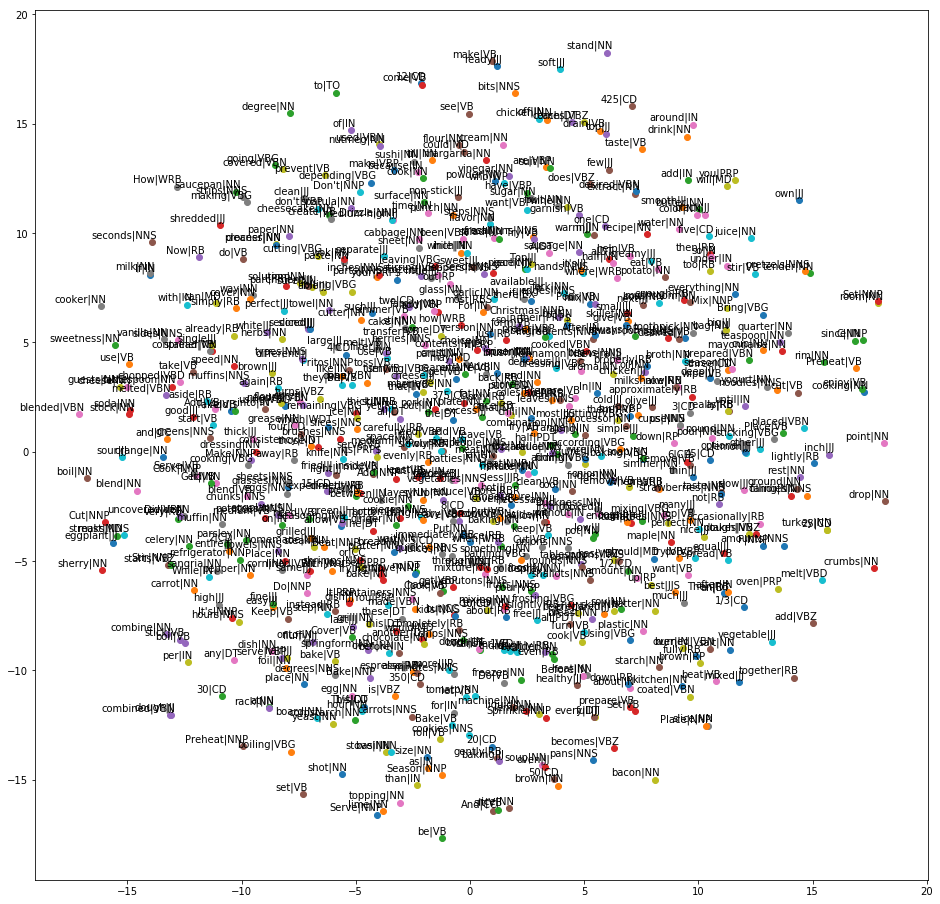

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
tsne_plot(word_vectors)

In [7]:
word_vectors2 = gensim.models.KeyedVectors.load_word2vec_format('data/mymodel-new-5-50', binary=True)
#tsne_plot(word_vectors2)

In [34]:
word_vectors.most_similar('Preheat|NNP')

[('half|JJ', 0.9995705485343933),
 ('bit|NN', 0.9995648860931396),
 ('it|PRP', 0.9995554685592651),
 ('tomatoes|NNS', 0.9995554089546204),
 ('now|RB', 0.9995442032814026),
 ('contents|NNS', 0.9995419383049011),
 ('leave|VB', 0.9995399117469788),
 ('degrees|NNS', 0.9995383024215698),
 ('egg|NN', 0.9995352029800415),
 ('crust|NN', 0.9995349645614624)]

In [13]:
word_vectors2.most_similar('preheat')

[('preheated', 0.8432373404502869),
 ('defrost', 0.8369258046150208),
 ('broil', 0.8340867161750793),
 ('reheat', 0.8224236965179443),
 ('thaw', 0.7789981961250305),
 ('Preheat', 0.7708083391189575),
 ('convection', 0.7661991119384766),
 ('broiler', 0.7644713521003723),
 ('Pre-heat', 0.7382760047912598),
 ('marinate', 0.7361683249473572)]

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
tsne_plot(word_vectors2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
